In [1]:
import pandas as pd
import numpy as np

# 0) Lecture du fichier

In [2]:
df_financial = pd.read_csv(
    "../data/complaints.csv",
    low_memory=False,
    index_col=0,          # on  enlève la première colonne index
    encoding="utf-8"
)

print(df_financial.shape)
print(df_financial.columns[:15])
df_financial.head()

(2023066, 10)
Index(['product_5', 'narrative', 'Product', 'Date received', 'Sub-product',
       'Issue', 'Sub-issue', 'Company', 'State', 'Timely response?'],
      dtype='str')


,product_5,narrative,Product,Date received,Sub-product,Issue,Sub-issue,Company,State,Timely response?
234,Credit Reporting,Dear Possible Financial Inc you guyss aree rep...,Credit reporting or other personal consumer re...,2024-07-27,Credit reporting,Incorrect information on your report,Account information incorrect,Possible Financial Inc,MI,Yes
240,Debt Collection,"XXXX XXXX XXXX ( debt collector ), sent my boy...",Debt collection,2024-07-27,I do not know,Threatened to contact someone or share informa...,Talked to a third-party about your debt,BlueChip Financial,TX,Yes
257,Credit Reporting,I been receiving alerts my information was fou...,Credit reporting or other personal consumer re...,2024-07-23,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,FC HoldCo LLC,SC,Yes
271,Credit Reporting,Subject : Dispute of Inaccurate Information on...,Credit reporting or other personal consumer re...,2024-07-27,Credit reporting,Improper use of your report,Reporting company used your report improperly,CORELOGIC INC,GA,Yes
276,Loans,They allowed me to use the account for about a...,"Payday loan, title loan, personal loan, or adv...",2024-07-26,Payday loan,Received a loan you didn't apply for,NaN,MoneyLion Inc.,PA,Yes


# A) Aperçu + qualité

In [3]:
import pandas as pd
import numpy as np

df = df_financial.copy()

# 1) infos générales
print(df.shape)
display(df.head(3))
display(df.sample(3, random_state=42))



(2023066, 10)


,product_5,narrative,Product,Date received,Sub-product,Issue,Sub-issue,Company,State,Timely response?
234,Credit Reporting,Dear Possible Financial Inc you guyss aree rep...,Credit reporting or other personal consumer re...,2024-07-27,Credit reporting,Incorrect information on your report,Account information incorrect,Possible Financial Inc,MI,Yes
240,Debt Collection,"XXXX XXXX XXXX ( debt collector ), sent my boy...",Debt collection,2024-07-27,I do not know,Threatened to contact someone or share informa...,Talked to a third-party about your debt,BlueChip Financial,TX,Yes
257,Credit Reporting,I been receiving alerts my information was fou...,Credit reporting or other personal consumer re...,2024-07-23,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,FC HoldCo LLC,SC,Yes


,product_5,narrative,Product,Date received,Sub-product,Issue,Sub-issue,Company,State,Timely response?
1728755,Credit Reporting,I have asked XXXX XXXX and experian to have XX...,"Credit reporting, credit repair services, or o...",2023-05-16,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,Experian Information Solutions Inc.,OR,Yes
1594921,Credit Reporting,This is my fourth endeavor to tell you that I ...,"Credit reporting, credit repair services, or o...",2023-01-24,Credit reporting,Incorrect information on your report,Information belongs to someone else,Experian Information Solutions Inc.,CA,Yes
4380652,Loans,I took out a small loan which I thought was a ...,"Payday loan, title loan, or personal loan",2022-08-25,Payday loan,Charged fees or interest you didn't expect,NaN,Minto Financial dba Minto Money,WA,Yes


In [4]:
# 2) types + % missing
missing = (df.isna().mean()*100).sort_values(ascending=False).to_frame("%missing")
dtypes = df.dtypes.to_frame("dtype")
profile = dtypes.join(missing)
display(profile)



,dtype,%missing
product_5,str,0.000000
narrative,str,0.000000
Product,str,0.000000
Date received,str,0.000000
Sub-product,str,2.580539
Issue,str,0.000000
Sub-issue,str,11.396514
Company,str,0.000000
State,str,0.363013
Timely response?,str,0.000000


In [5]:
# 3) doublons sur narrative
dup_rate = df.duplicated(subset=["narrative"]).mean()*100
print(f"Duplicate narratives: {dup_rate:.2f}%")

Duplicate narratives: 21.08%


# B) Distrib des labels (product_5 et Product)

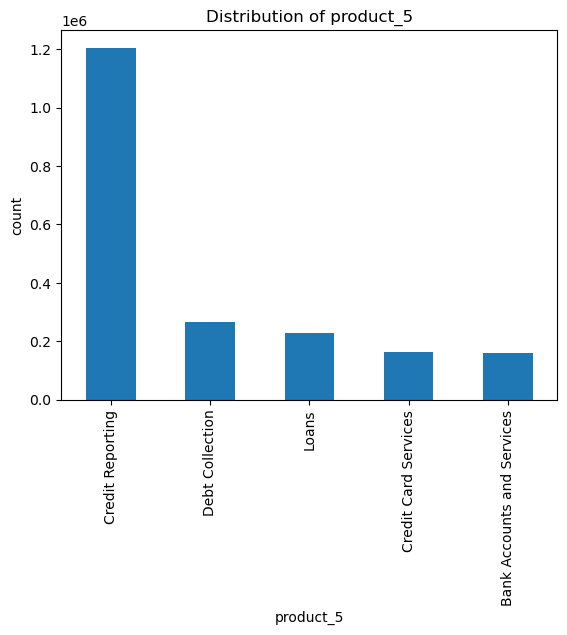

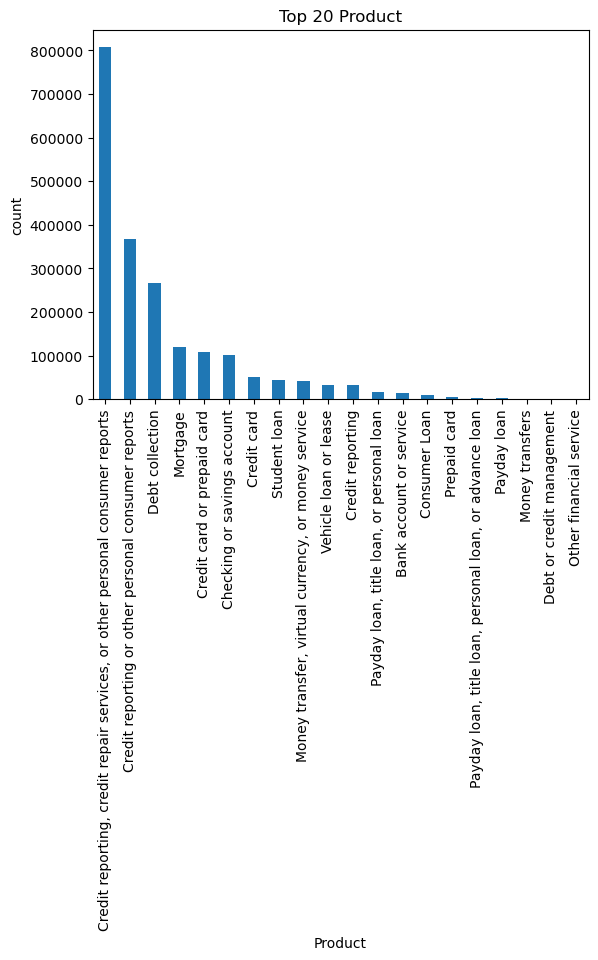

In [6]:
import matplotlib.pyplot as plt

df["product_5"].value_counts().plot(kind="bar")
plt.title("Distribution of product_5")
plt.ylabel("count")
plt.show()

df["Product"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 Product")
plt.ylabel("count")
plt.show()

# Voici le condensé de la colonne initiale Product devenu Product_5
## MORE INFORMATION ABOUT THE DATASET , IS AVALIABLE HERE : https://www.kaggle.com/datasets/namigabbasov/consumer-complaint-dataset?utm_source=chatgpt.com
1. Credit Reporting ( "Credit reporting, credit repair services, or other personal consumer reports", "Credit reporting or other personal consumer reports", "Credit reporting")
2. Debt Collection ("Debt Collection")
3. Loans ("Mortgage", "Student loan", "Vehicle loan or lease", "Payday loan, title loan, or personal loan", "Payday loan, title loan, personal loan, or advance loan", "Payday loan", "Consumer Loan","Debt or credit management")
4. Credit Card Services ("Credit card or prepaid card", "Credit card", "Prepaid card")
5. Bank Account and Services ("Checking or savings account", "Bank account or service", "Money transfer, virtual currency, or money service", "Money transfers", "Virtual currency", "Other financial service)

# C) Longueur des textes

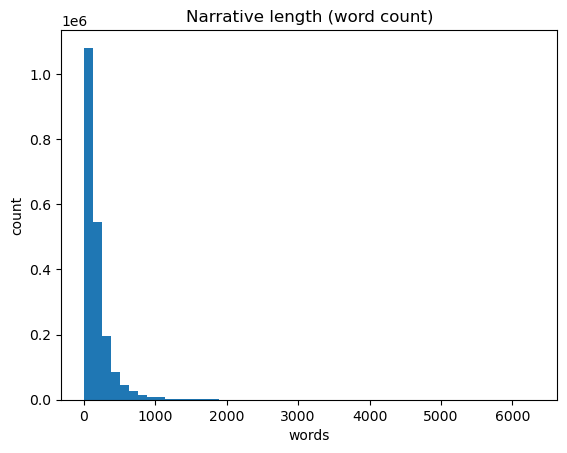

In [7]:
df["narrative_len"] = df["narrative"].astype(str).str.split().str.len()

df["narrative_len"].describe(percentiles=[.5,.75,.9,.95,.99])

df["narrative_len"].plot(kind="hist", bins=50)
plt.title("Narrative length (word count)")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

# D) Colonnes “utiles” : score de complétude + valeur métier

In [8]:
useful_cols = ["narrative","product_5","Product","Issue","Sub-issue","Company","State","Date received","Timely response?","Sub-product"]
summary = pd.DataFrame({
    "missing_%": df[useful_cols].isna().mean()*100,
    "n_unique": df[useful_cols].nunique(dropna=True)
}).sort_values("missing_%")

display(summary)

,missing_%,n_unique
narrative,0.000000,1596682
product_5,0.000000,5
Product,0.000000,21
Issue,0.000000,173
Company,0.000000,6165
Date received,0.000000,3417
Timely response?,0.000000,2
State,0.363013,63
Sub-product,2.580539,85
Sub-issue,11.396514,266


### Visualisations top 15 issues

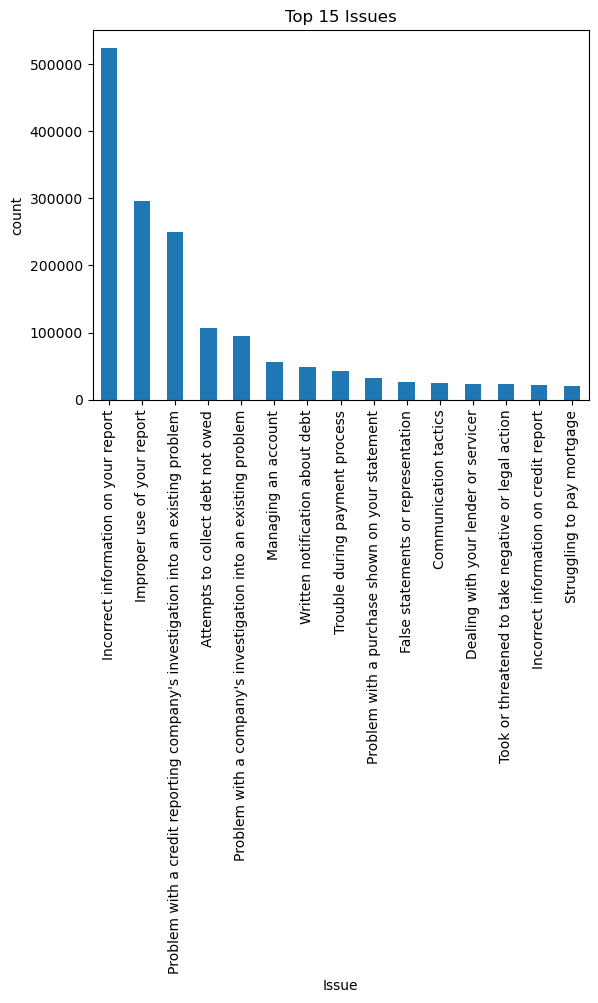

In [9]:
df["Issue"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Issues")
plt.ylabel("count")
plt.show()

# E) pipeline clean + export

In [10]:
import re


# 1) rename clean ( plus simple)
df = df.rename(columns={
    "Date received": "date_received",
    "Sub-product": "sub_product",
    "Sub-issue": "sub_issue",
    "Timely response?": "timely_response"
})

# 2) strip + normalize categories
cat_cols = ["product_5","Product","Issue","sub_issue","Company","State","sub_product","timely_response"]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype("string").str.strip()
        df[c] = df[c].replace({"": pd.NA, "nan": pd.NA})

# 3) parse date
df["date_received"] = pd.to_datetime(df["date_received"], errors="coerce")

# 4) clean narrative (léger)
def clean_text(s: str) -> str:
    s = str(s)
    s = s.replace("\u00a0", " ")            
    s = re.sub(r"\s+", " ", s).strip()      
    return s

df["narrative"] = df["narrative"].astype("string").map(clean_text)

# 5) drop empty narratives (rare)
df = df[df["narrative"].notna() & (df["narrative"].str.len() > 20)]

# 6) remove duplicates 
df = df.drop_duplicates(subset=["narrative"])

# 7) add helper columns for analysis
df["n_words"] = df["narrative"].str.split().str.len()

print(df.shape)
df.head()

(1556793, 12)


,product_5,narrative,Product,date_received,sub_product,Issue,sub_issue,Company,State,timely_response,narrative_len,n_words
234,Credit Reporting,Dear Possible Financial Inc you guyss aree rep...,Credit reporting or other personal consumer re...,2024-07-27,Credit reporting,Incorrect information on your report,Account information incorrect,Possible Financial Inc,MI,Yes,125,125
240,Debt Collection,"XXXX XXXX XXXX ( debt collector ), sent my boy...",Debt collection,2024-07-27,I do not know,Threatened to contact someone or share informa...,Talked to a third-party about your debt,BlueChip Financial,TX,Yes,83,83
257,Credit Reporting,I been receiving alerts my information was fou...,Credit reporting or other personal consumer re...,2024-07-23,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,FC HoldCo LLC,SC,Yes,35,35
271,Credit Reporting,Subject : Dispute of Inaccurate Information on...,Credit reporting or other personal consumer re...,2024-07-27,Credit reporting,Improper use of your report,Reporting company used your report improperly,CORELOGIC INC,GA,Yes,431,431
276,Loans,They allowed me to use the account for about a...,"Payday loan, title loan, personal loan, or adv...",2024-07-26,Payday loan,Received a loan you didn't apply for,<NA>,MoneyLion Inc.,PA,Yes,45,45


- Export (clean + sample)

- clean full (en parquet, bien plus rapide que CSV)

- sample stratifié (pour dev)

In [21]:

# Full clean (parquet)
df.to_parquet("../data/complaints_clean.parquet", index=False, engine="fastparquet")

# Stratified sample for fast iteration (e.g., 5k per class => ~25k)
n_per_class = 5000
df_sample = (df.groupby("product_5", group_keys=False)
               .apply(lambda x: x.sample(min(len(x), n_per_class), random_state=42)))
df_sample.to_parquet("../data/complaints_sample.parquet", index=False, engine="fastparquet")
print(df_sample.shape)

(25000, 11)
